In [1]:
from pprint import pprint
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
import maup
import multiprocessing as mp
from pyproj import CRS
import re

In [2]:
# Get the current working directory
current_directory = os.getcwd()
move_up = os.path.dirname(os.path.dirname(current_directory))
data_dir = os.path.join(move_up, 'Data')
new_path = os.chdir(data_dir)
print(os.getcwd())

/Users/aaronlin/Downloads/Spring 2024/CSE 416/Data


# Data

---

- [ ] Find Precinct Data (Nevada + Mississippi)
- [ ] Find State Assembly Shapefile
- [ ] Demographic Population

# Pre-processing

---

- [ ] Read ShapeFile
- [ ] Convert ShapeFile -> GeoJSON
- [ ] Multi-threaded and Parallelize Code
- [ ] 

### Mississippi State Assembly Data Processing

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Index(['ID', 'AREA', 'DISTRICT', 'MEMBERS', 'LOCKED', 'NAME', 'POPULATION',
       'WHITE', 'BLACK', 'F18_POP', 'F18_WHT', 'F18_BLK', 'F18_AP_BLK',
       'IDEAL_VALU', 'DEVIATION', 'F_DEVIATIO', 'F_WHITE', 'F_BLACK',
       'F_18_POP', 'F_18_WHT', 'F_18_BLK', 'DIST_NUM', 'F_18_AP_BL',
       'DISTRICT_L', 'MULTIPLE_F', 'MULTIPLE_1', 'OTH', 'LABEL', 'Distnum',
       'Sen_Shade', 'Shade_Num', 'Dist20', 'geometry'],
      dtype='object')

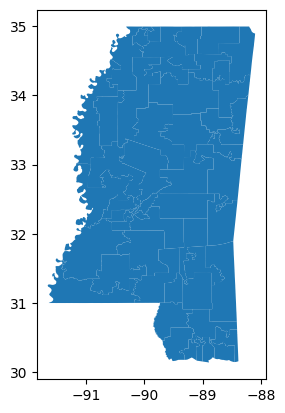

In [345]:
ms_districts_df = gpd.read_file('ms_State_Assembly_2022.geojson')
ms_districts_df.plot()

# plt.show()

ms_districts_df.to_crs(epsg=4326, inplace=True)
display(ms_districts_df.crs)
display(ms_districts_df.columns)

# ms_districts_df.to_file('ms_State_Assembly_2022.geojson', driver='GeoJSON')


Data gathered from [Redistricting Data](https://redistrictingdatahub.org/dataset/2022-mississippi-senate-districts-approved-plan/)

### Demographic Data on Block Level

,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,...,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,HVAP,LOGRECNO,GEOCODE,SUMLEV,districtr,geometry
0,28,151,000300,3,281510003003,Block Group 3,G5030,S,2322883,0,...,0,0,0,6,3,3684,281510003003,150,-1,"MULTIPOLYGON (((-91.05266 33.42556, -91.05213 ..."
1,28,151,001500,2,281510015002,Block Group 2,G5030,S,38328376,227053,...,7,0,0,13,13,3719,281510015002,150,-1,"MULTIPOLYGON (((-91.14362 33.32827, -91.14362 ..."
2,28,151,000800,1,281510008001,Block Group 1,G5030,S,16951616,16692,...,14,0,0,22,11,3701,281510008001,150,-1,"MULTIPOLYGON (((-91.11184 33.32652, -91.11179 ..."
3,28,151,001400,2,281510014002,Block Group 2,G5030,S,816612,0,...,0,0,0,4,1,3715,281510014002,150,-1,"MULTIPOLYGON (((-91.03799 33.39472, -91.03791 ..."
4,28,151,000100,1,281510001001,Block Group 1,G5030,S,729919265,7673494,...,0,1,0,17,19,3678,281510001001,150,-1,"MULTIPOLYGON (((-90.98937 33.44372, -90.98885 ..."


Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLKGRPCE20', 'GEOID20',
       'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'TOTPOP', 'WHITE', 'BLACK', 'AMIN', 'ASIAN',
       'NHPI', 'OTHER', '2MORE', 'HISP', 'VAP', 'WVAP', 'BVAP', 'AMINVAP',
       'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'HVAP', 'LOGRECNO',
       'GEOCODE', 'SUMLEV', 'districtr', 'geometry'],
      dtype='object')

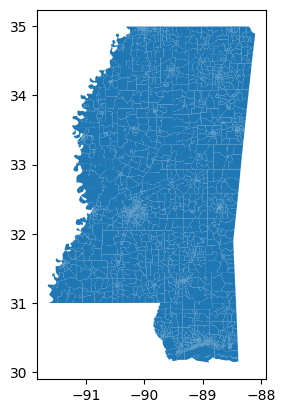

In [344]:
ms_block_race_df = gpd.read_file('ms-block-demo-2020.geojson')

# ms_block_race_df['area'] = ms_block_race_df['geometry'].area
# ms_block_race_df.explore('area', legend=False)
# ms_block_race_df.explore('STATEFP20', legend=False)
ms_block_race_df.plot()
display(ms_block_race_df.head())
display(ms_block_race_df.columns)

# https://redistrictingdatahub.org/dataset/mississippi-2022-select-race-data-from-the-american-community-survey-20182022-at-the-block-group-level/
# diff_block_df = gpd.read_file('MS/ms_race_2022_bg/ms_race_2022_bg.shp')
# display(diff_block_df.isna().sum())
# display(diff_block_df.columns)


# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
# ax1 = diff_block_df.plot(ax=ax1)
# ax2 = ms_block_race_df.plot(ax=ax2)

Data from [Districtr](https://districtr.org/plan)

### General Elections Precinct Data + Geometry

In [350]:
ms_prec_bound_2022_df = gpd.read_file('ms_gen_22_prec/ms_gen_22_prec.shp')
# ms_prec_bound_2022_df.to_file('msGenPrecBound2022', driver='GeoJSON')
# ms_prec_bound_2022_df.explore()


ms_prec_bound_2022_df

# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
# ax1 = ms_prec_bound_2022_df.plot(ax=ax1)
# ax2 = ms_block_race_df.plot(ax=ax2)

DriverError: ms_gen_22_prec/ms_gen_22_prec.shp: No such file or directory

In [ ]:
ms_prec_bound_2022_df.columns

Data from [Redistricting Hub](https://redistrictingdatahub.org/dataset/mississippi-2022-general-election-precinct-level-results-and-boundaries/)

In [ ]:
ms_prec_data = ms_prec_bound_2022_df
display(ms_prec_data.columns)

ms_block_data = ms_block_race_df
display(ms_block_data.columns)

ms_block_data.to_crs(32030, inplace=True)
ms_prec_data.to_crs(32030, inplace=True)
display(ms_prec_data.crs)


In [ ]:
# maup.doctor(ms_block_data)
maup.doctor(ms_prec_data)
# print(ms_prec_data.geometry.is_valid)

In [ ]:
display(ms_prec_data.estimate_utm_crs())
ms_prec_data.to_crs(epsg=32030, inplace=True)
ms_prec_data = maup.smart_repair(ms_prec_data)

In [ ]:
ms_prec_data
block_prec_aggr = maup.assign(ms_block_data, ms_prec_data)
display(ms_prec_data.columns.intersection(ms_block_data.columns))


In [ ]:
display(ms_prec_data)
ms_prec_data.to_file("fixed_ms_prec_geom.geojson", driver="GeoJSON")

In [ ]:
display(ms_prec_data.columns)
display(ms_block_data.columns)

### Redistrcting Hub Precinct Level Data + Districtr Block Demographic Data provided better geometry

In [ ]:
variables = ['TOTPOP', 'WHITE', 'BLACK', 'ASIAN', 'HISP']

ms_prec_data[variables] = ms_block_data[variables].groupby(block_prec_aggr).sum()


# display(ms_prec_data[variables].head())
# display(ms_prec_data.isna().sum())
# display(ms_prec_data)
# ms_prec_data.plot()

In [ ]:
ms_prec_data['2022_DEMOCRATIC'] = ms_prec_data[['GCON01DBLA', 'GCON02DTHO', 'GCON03DYOU', 'GCON04DDUP']].sum(axis=1)
ms_prec_data['2022_REPUBLICAN'] = ms_prec_data[['GCON01RKEL', 'GCON02RFLO', 'GCON03RGUE', 'GCON04REZE']].sum(axis=1)
ms_prec_data['2022_LIBERAL'] = ms_prec_data[['GCON04LJOH']].sum(axis=1)

# display(ms_prec_data)

ms_prec_data['border'] = ms_prec_data.buffer(200)

# ms_prec_data['border'].plot()
rows = [row for _, row in ms_prec_data.groupby(ms_prec_data.index)]

new_prec_data = ms_prec_data.drop(['GCON01DBLA', 'GCON02DTHO', 'GCON03DYOU', 'GCON04DDUP', 
                                      'GCON01RKEL', 'GCON02RFLO', 'GCON03RGUE', 'GCON04REZE', 
                                     'GCON04LJOH', 'POLL_LOC', 'CNTY_CODE'], axis=1)

new_prec_data

In [ ]:
new_prec_data.plot(column='WHITE', cmap='OrRd', legend=True)

# 2023 General Election Precinct-Level Results

In [19]:
ms_gen_23 = gpd.read_file('MS Data/ms_gen_2023_prec/ms_gen_2023_prec.csv')
ms_gov_unfiltered = ms_gen_23.iloc[:, :4].join(ms_gen_23.iloc[:, 10:13])

In [20]:
ms_gov_unfiltered

,UNIQUE_ID,COUNTYFP,County,precinct,G23GOVDPRE,G23GOVIGRA,G23GOVRREE
0,"Adams-:-Dist. 1, Bellemont Precinct",1,Adams,"Dist. 1, Bellemont Precinct",443,7,652
1,"Adams-:-Dist. 1, By-Pass Fire Precinct",1,Adams,"Dist. 1, By-Pass Fire Precinct",336,9,127
2,"Adams-:-Dist. 1, Courthouse Precinct",1,Adams,"Dist. 1, Courthouse Precinct",179,3,276
3,"Adams-:-Dist. 2, Beau Pre Precinct",1,Adams,"Dist. 2, Beau Pre Precinct",274,5,356
4,"Adams-:-Dist. 2, Duncan Park Precinct",1,Adams,"Dist. 2, Duncan Park Precinct",284,13,305
...,...,...,...,...,...,...,...
1743,Yazoo-:-Valley,163,Yazoo,Valley,20,4,75
1744,Yazoo-:-Washington St. Fire Station,163,Yazoo,Washington St. Fire Station,128,4,103
1745,Yazoo-:-Welfare Office,163,Yazoo,Welfare Office,149,3,70
1746,Yazoo-:-West Bentonia,163,Yazoo,West Bentonia,193,5,146


In [ ]:

ms_gov_unfiltered.to_excel('ms_atg_gov_unfiltered.xlsx')

We remove columns we don't need such as results from Commissioner of Agriculture & Commerce \
and other parties

In [21]:
ms_unused_columns = ['G23GOVIGRA']
ms_gov_23 = ms_gov_unfiltered.drop(ms_unused_columns, axis=1)

ATG and GOV data from [Redistricting Hub](https://redistrictingdatahub.org/dataset/mississippi-2023-general-election-precinct-level-results/)

In [39]:
ms_vest_20 = gpd.read_file('MS Data/ms_vest_20/ms_vest_20.shp')
ms_vest_20.columns
to_m

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PRERTRU',
       'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW', 'G20PREABLA', 'G20PREOCAR',
       'G20PREIWES', 'G20PREICOL', 'G20PREIPIE', 'G20USSRHYD', 'G20USSDESP',
       'G20USSLEDW', 'geometry'],
      dtype='object')

In [40]:
ms_vest_repaired

/Users/aaronlin/anaconda3/lib/python3.11/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 29 overlaps.


False

"VEST Presidential Election Data from [Redistricting Hub](https://redistrictingdatahub.org/dataset/vest-2020-mississippi-precinct-and-election-results/) \
Precinct-Level Presidential Data + Geometry

In [ ]:
ms_vest_20.to_excel('ms_vest_20.xlsx')

In [24]:
ms_pres_prec_20 = ms_vest_20.iloc[:, :7].join(ms_vest_20.iloc[:, -4:])
ms_pres_prec_20

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20USSRHYD,G20USSDESP,G20USSLEDW,geometry
0,28,017,000107,28017000107,Egypt,126,225,115,236,2,"POLYGON ((-88.82480 33.94316, -88.82453 33.943..."
1,28,017,000114,28017000114,Pearsall,242,74,238,80,9,"POLYGON ((-89.00631 33.80302, -89.00614 33.803..."
2,28,017,000115,28017000115,Sparta,146,55,133,70,3,"POLYGON ((-89.05173 33.73943, -89.05171 33.739..."
3,28,017,000112,28017000112,Pleasant Grove,526,76,495,96,15,"POLYGON ((-89.13864 34.02296, -89.13837 34.022..."
4,28,017,000106,28017000106,East Okolona,74,667,70,689,2,"POLYGON ((-88.81077 33.94324, -88.81074 33.943..."
...,...,...,...,...,...,...,...,...,...,...,...
1759,28,005,000404,28005000404,Tangipahoa,393,54,382,61,5,"POLYGON ((-90.65831 31.22681, -90.65822 31.226..."
1760,28,135,000503,28135000503,Tutwiler,46,439,39,455,3,"POLYGON ((-90.45110 34.06443, -90.45106 34.065..."
1761,28,053,000502,28053000502,Louise,100,301,87,317,7,"POLYGON ((-90.65686 33.01126, -90.65686 33.011..."
1762,28,067,000205,28067000205,Gitano,186,60,172,66,6,"POLYGON ((-89.35844 31.79947, -89.35780 31.799..."


In [25]:
ms_unused_prec_col = ['G20USSLEDW', 'GEOID20']
pres_str_to_int = ['STATEFP20', 'COUNTYFP20', 'VTDST20']
ms_pres_20 = ms_pres_prec_20.drop(ms_unused_prec_col, axis=1)
ms_pres_20[pres_str_to_int] = ms_pres_20[pres_str_to_int].astype(int)
ms_pres_20.sort_values(by='COUNTYFP20', inplace=True)
ms_pres_20

,STATEFP20,COUNTYFP20,VTDST20,NAME20,G20PRERTRU,G20PREDBID,G20USSRHYD,G20USSDESP,geometry
139,28,1,405,Morgantown,106,352,99,362,"POLYGON ((-91.36184 31.57409, -91.36181 31.574..."
138,28,1,401,Northside School,58,1062,55,1069,"POLYGON ((-91.51792 31.61864, -91.51790 31.620..."
122,28,1,102,By-Pass Firestation,262,521,248,539,"POLYGON ((-91.65501 31.25181, -91.65468 31.253..."
123,28,1,101,Courthouse,399,185,385,199,"POLYGON ((-91.41666 31.55654, -91.41641 31.556..."
124,28,1,202,Duncan Park,466,387,432,410,"MULTIPOLYGON (((-91.38212 31.53285, -91.38191 ..."
...,...,...,...,...,...,...,...,...,...
891,28,163,109,Valley,157,21,144,33,"POLYGON ((-90.43728 32.76199, -90.43718 32.761..."
890,28,163,204,Ward 2 Welfare Office,127,221,115,238,"POLYGON ((-90.40328 32.85643, -90.40291 32.856..."
889,28,163,302,3-2 Old Jr. High,80,467,58,495,"POLYGON ((-90.41406 32.84650, -90.41375 32.847..."
500,28,163,104,Fugates,197,180,189,185,"POLYGON ((-90.31540 32.66580, -90.31527 32.665..."


In [26]:
def clean_location(location):
    # Replace patterns using regex
    location = re.sub(r'Dist\.\s\d+,\s(.+)\sPrecinct', r'\1', location)
    location = re.sub(r'County\sPrecinct\s\d+-([A-Za-z])', r'District \1', location)
    location = re.sub(r'Precinct\s(\d+)', r'\1', location)
    location = re.sub(r'Beat\s\d+\s([A-Za-z]+)\s\([A-Z]+\)', r'\1', location)
    location = re.sub(r'([A-Za-z]+)\sNorth\s-\s(\d+b?n)\s(\d+)', r'\1 \2 \3', location)
    location = re.sub(r'([A-Za-z]+)\sHighway\s\d+\s-\s\d+', r'\1 Hwy', location)
    # Additional regex patterns
    location = re.sub(r'\d+\s-\s(.+)', r'\1', location)
    location = re.sub(r'\(\d+\)\s(.+)', r'\1', location)
    location = re.sub(r'(\d+)\s-\s([A-Za-z-]+)', r'\2', location)
    location = re.sub(r'([A-Za-z ]+)\(\w+-\w+\)', r'\1', location)
    location = re.sub(r'(\w+)\s(\d+)', r'\1 \2', location)
    location = re.sub(r'(\w+)\s(\w+)\s(\d+)', r'\1 \2 \3', location)
    location = re.sub(r'(\w+)\s(\d+)(\w+)', r'\1 \2 \3', location)
    # Remove 'Beat' at the beginning of a string
    location = re.sub(r'^Beat\s*', '', location)
    location = re.sub(r'^\d+\s*-', '', location.strip())

    return location.lstrip('0123456789.- ').upper()

def remove_symbols(text):
    # Remove '.' and '#'
    cleaned_text = re.sub(r'[.#\']', '', text)
    return cleaned_text

def replace_with_space(text):
    # Replace '/' and '-' with a space
    cleaned_text = re.sub(r'[\\/-]', ' ', text)
    return cleaned_text

In [27]:
ms_gov_23['Location Cleaned'] = ms_gov_23['precinct'].apply(clean_location).apply(remove_symbols).apply(replace_with_space)
# ms_atg_gov_23['Location Cleaned'] = ms_atg_gov_23['Location Cleaned']
ms_gov_23

,UNIQUE_ID,COUNTYFP,County,precinct,G23GOVDPRE,G23GOVRREE,Location Cleaned
0,"Adams-:-Dist. 1, Bellemont Precinct",1,Adams,"Dist. 1, Bellemont Precinct",443,652,BELLEMONT
1,"Adams-:-Dist. 1, By-Pass Fire Precinct",1,Adams,"Dist. 1, By-Pass Fire Precinct",336,127,BY PASS FIRE
2,"Adams-:-Dist. 1, Courthouse Precinct",1,Adams,"Dist. 1, Courthouse Precinct",179,276,COURTHOUSE
3,"Adams-:-Dist. 2, Beau Pre Precinct",1,Adams,"Dist. 2, Beau Pre Precinct",274,356,BEAU PRE
4,"Adams-:-Dist. 2, Duncan Park Precinct",1,Adams,"Dist. 2, Duncan Park Precinct",284,305,DUNCAN PARK
...,...,...,...,...,...,...,...
1743,Yazoo-:-Valley,163,Yazoo,Valley,20,75,VALLEY
1744,Yazoo-:-Washington St. Fire Station,163,Yazoo,Washington St. Fire Station,128,103,WASHINGTON ST FIRE STATION
1745,Yazoo-:-Welfare Office,163,Yazoo,Welfare Office,149,70,WELFARE OFFICE
1746,Yazoo-:-West Bentonia,163,Yazoo,West Bentonia,193,146,WEST BENTONIA


In [28]:
ms_gov_23.loc[ms_gov_23['COUNTYFP'] == 'NONE', 'COUNTYFP'] = 33
ms_gov_23.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'County', 'precinct', 'G23GOVDPRE',
       'G23GOVRREE', 'Location Cleaned'],
      dtype='object')

In [29]:
strs_to_int_col = ['COUNTYFP', 'G23GOVDPRE', 'G23GOVRREE']
ms_gov_23[strs_to_int_col] = ms_gov_23[strs_to_int_col].astype('int')
ms_gov_23['UNIQUE_ID'] = (ms_gov_23['Location Cleaned'] + ' ' + ms_gov_23['COUNTYFP'].astype('str')).astype('str')

In [30]:
ms_gov_23

,UNIQUE_ID,COUNTYFP,County,precinct,G23GOVDPRE,G23GOVRREE,Location Cleaned
0,BELLEMONT 1,1,Adams,"Dist. 1, Bellemont Precinct",443,652,BELLEMONT
1,BY PASS FIRE 1,1,Adams,"Dist. 1, By-Pass Fire Precinct",336,127,BY PASS FIRE
2,COURTHOUSE 1,1,Adams,"Dist. 1, Courthouse Precinct",179,276,COURTHOUSE
3,BEAU PRE 1,1,Adams,"Dist. 2, Beau Pre Precinct",274,356,BEAU PRE
4,DUNCAN PARK 1,1,Adams,"Dist. 2, Duncan Park Precinct",284,305,DUNCAN PARK
...,...,...,...,...,...,...,...
1743,VALLEY 163,163,Yazoo,Valley,20,75,VALLEY
1744,WASHINGTON ST FIRE STATION 163,163,Yazoo,Washington St. Fire Station,128,103,WASHINGTON ST FIRE STATION
1745,WELFARE OFFICE 163,163,Yazoo,Welfare Office,149,70,WELFARE OFFICE
1746,WEST BENTONIA 163,163,Yazoo,West Bentonia,193,146,WEST BENTONIA


In [373]:
ms_gov_23.to_excel('ms_atg_gov_23.xlsx')

In [31]:
ms_pres_20
ms_pres_20['UNIQUE_ID'] = (ms_pres_20['NAME20'].apply(replace_with_space).apply(remove_symbols).str.upper() + ' ' + ms_pres_20['COUNTYFP20'].astype('str')).astype('str')

In [38]:
ms_pres_20.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

In [376]:
ms_pres_20.to_excel('ms_pres_20.xlsx')

In [35]:
test_merge = pd.merge(ms_pres_20, ms_gov_23, on='UNIQUE_ID', how='left')
pprint(test_merge.isna().sum())
test_merge.shape

STATEFP20             0
COUNTYFP20            0
VTDST20               0
NAME20                0
G20PRERTRU            0
G20PREDBID            0
G20USSRHYD            0
G20USSDESP            0
geometry              0
UNIQUE_ID             0
COUNTYFP            598
County              598
precinct            598
G23GOVDPRE          598
G23GOVRREE          598
Location Cleaned    598
dtype: int64


(1765, 16)

In [37]:
# maup.doctor(test_merge)


AttributeError: 'DataFrame' object has no attribute 'crs'

In [398]:
test_merge.drop_duplicates(subset=['NAME20', 'COUNTYFP'], keep='first', inplace=True)
test_merge.sort_values(by=['COUNTYFP20', 'UNIQUE_ID'], inplace=True)
test_merge.shape

(1831, 16)

In [399]:
test_merge.to_excel('merge_outer.xlsx')


In [403]:
testing = pd.read_excel('merge_outer.xlsx')
testing

,Unnamed: 0,STATEFP20,COUNTYFP20,VTDST20,NAME20,G20PRERTRU,G20PREDBID,G20USSRHYD,G20USSDESP,geometry,UNIQUE_ID,COUNTYFP,County,precinct,G23GOVDPRE,G23GOVRREE,Location Cleaned
0,212,28.0,1.0,502.0,Airport,199.0,399.0,192.0,409.0,"POLYGON ((-91.348135 31.630637, -91.34803 31.6...",AIRPORT 1,1.0,Adams,"Dist. 5, Airport Precinct",297.0,126.0,AIRPORT
1,296,28.0,1.0,203.0,Beau Pre,496.0,318.0,471.0,332.0,"POLYGON ((-91.438699 31.444142999999997, -91.4...",BEAU PRE 1,1.0,Adams,"Dist. 2, Beau Pre Precinct",274.0,356.0,BEAU PRE
2,311,28.0,1.0,103.0,Bellemont,988.0,519.0,947.0,553.0,"POLYGON ((-91.423146 31.501517, -91.4231289999...",BELLEMONT 1,1.0,Adams,"Dist. 1, Bellemont Precinct",443.0,652.0,BELLEMONT
3,419,28.0,1.0,102.0,By-Pass Firestation,262.0,521.0,248.0,539.0,POLYGON ((-91.65500899999999 31.25181499999999...,BY PASS FIRESTATION 1,NaN,NaN,NaN,NaN,NaN,NaN
4,466,28.0,1.0,404.0,Carpenter,128.0,276.0,125.0,287.0,"POLYGON ((-91.40301 31.566489999999998, -91.40...",CARPENTER 1,1.0,Adams,"Dist. 4, Carpenter Precinct",206.0,87.0,CARPENTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SCHOOL 15,15.0,Carroll,430 School,156.0,61.0,SCHOOL
1827,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPRINGHILL 141,141.0,Tishomingo,Springhill,72.0,153.0,SPRINGHILL
1828,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STREET 5,5.0,Amite,Street,44.0,153.0,STREET
1829,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRONGHOPE UNION 29,29.0,Copiah,Stronghope Union,38.0,274.0,STRONGHOPE UNION


# Exploratory Data Analysis

- [ ] Precinct Neighbors
- [ ] MGGG Algorithm
- [ ] Calculate Election Winners
- [ ] Identify Opportunity Districts
- [ ] **Ecological Inference**


In [15]:
ms_election_precinct_df = pd.read_excel('MS Data/ms_election_precinct_data.xlsx')
ms_election_precinct_df['geometry'] = gpd.GeoSeries.from_wkt(ms_election_precinct_df['geometry'])


# ms_election_precinct_data = gpd.GeoDataFrame(ms_election_precinct_df, geometry=ms_election_precinct_df.geometry, crs='EPSG:4326')
# ms_election_precinct_data

GEOSException: ParseException: Expected number but encountered word: '-'